In [235]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv('../data/Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [237]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [238]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [239]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [240]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x356784a10>>


In [241]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_twp_rate', 'Value_cap_space', 'Previous_AV', 'Previous_PFF', 
                                           'Previous_ypa', 'Previous_qb_rating', 'Previous_grades_pass', 
                                           'Previous_accuracy_percent', 'Previous_btt_rate']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [242]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[  3.14234375  11.43995749  11.          64.33140625   7.97234375
    87.7428125   65.1784375   74.32578125   2.13875   ]
  [  3.4          0.61049445  15.          77.9          8.4
   102.          75.7         78.8          2.6       ]
  [  4.5137558   17.8630137   11.          61.55811437   7.5927357
    90.24605873  60.39690881  75.82952087   3.00850077]]

 [[  3.80300158   7.39638682  15.          62.19810427   7.31090047
    94.68720379  58.16319115  72.39494471   4.11879937]
  [  3.44566474   8.06760848   9.          64.65390173   6.17991329
    84.07037572  64.42196532  71.81921965   3.93973988]
  [  4.44748201   6.39452055  10.          64.11294964   6.37266187
    86.73453237  62.75971223  72.42374101   4.23309353]]

 [[  3.66574501   9.24017003  11.          71.89754224   6.5546851
    87.06513057  69.64009217  72.4          5.11213518]
  [  4.6108484    0.61049445   8.          60.80876217   6.41641168
    75.65215577  60.30166898  68.67232267   2.71043115]
  [  3.536950

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [244]:
# Define the input layer
inputs = Input(shape=(3, 9))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [245]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [246]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 5098.3599 - val_loss: 5156.1040
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4811.0127 - val_loss: 5018.1133
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4849.9941 - val_loss: 4900.1602
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4514.5303 - val_loss: 4772.7476
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4556.7324 - val_loss: 4629.7607
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4384.6919 - val_loss: 4479.1768
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4218.7090 - val_loss: 4313.8149
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4243.2642 - val_loss: 4104.2300
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3863.4233 - val_loss: 3854.1877
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3794.3525 - val_loss: 3557.1541
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3434.3572 - val_loss: 3211.1731
Epoch 12/80
4/4 ━━━━━━━━━━━

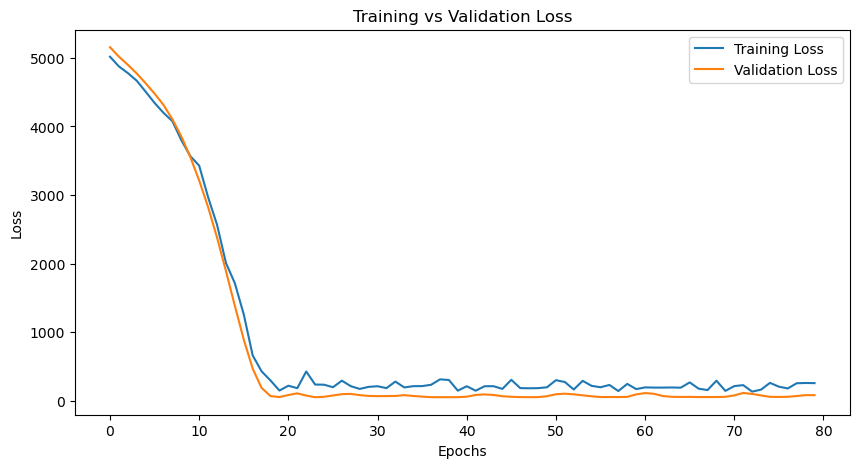

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
R² Score: -0.0771
Saved new best model with R² = -0.0771


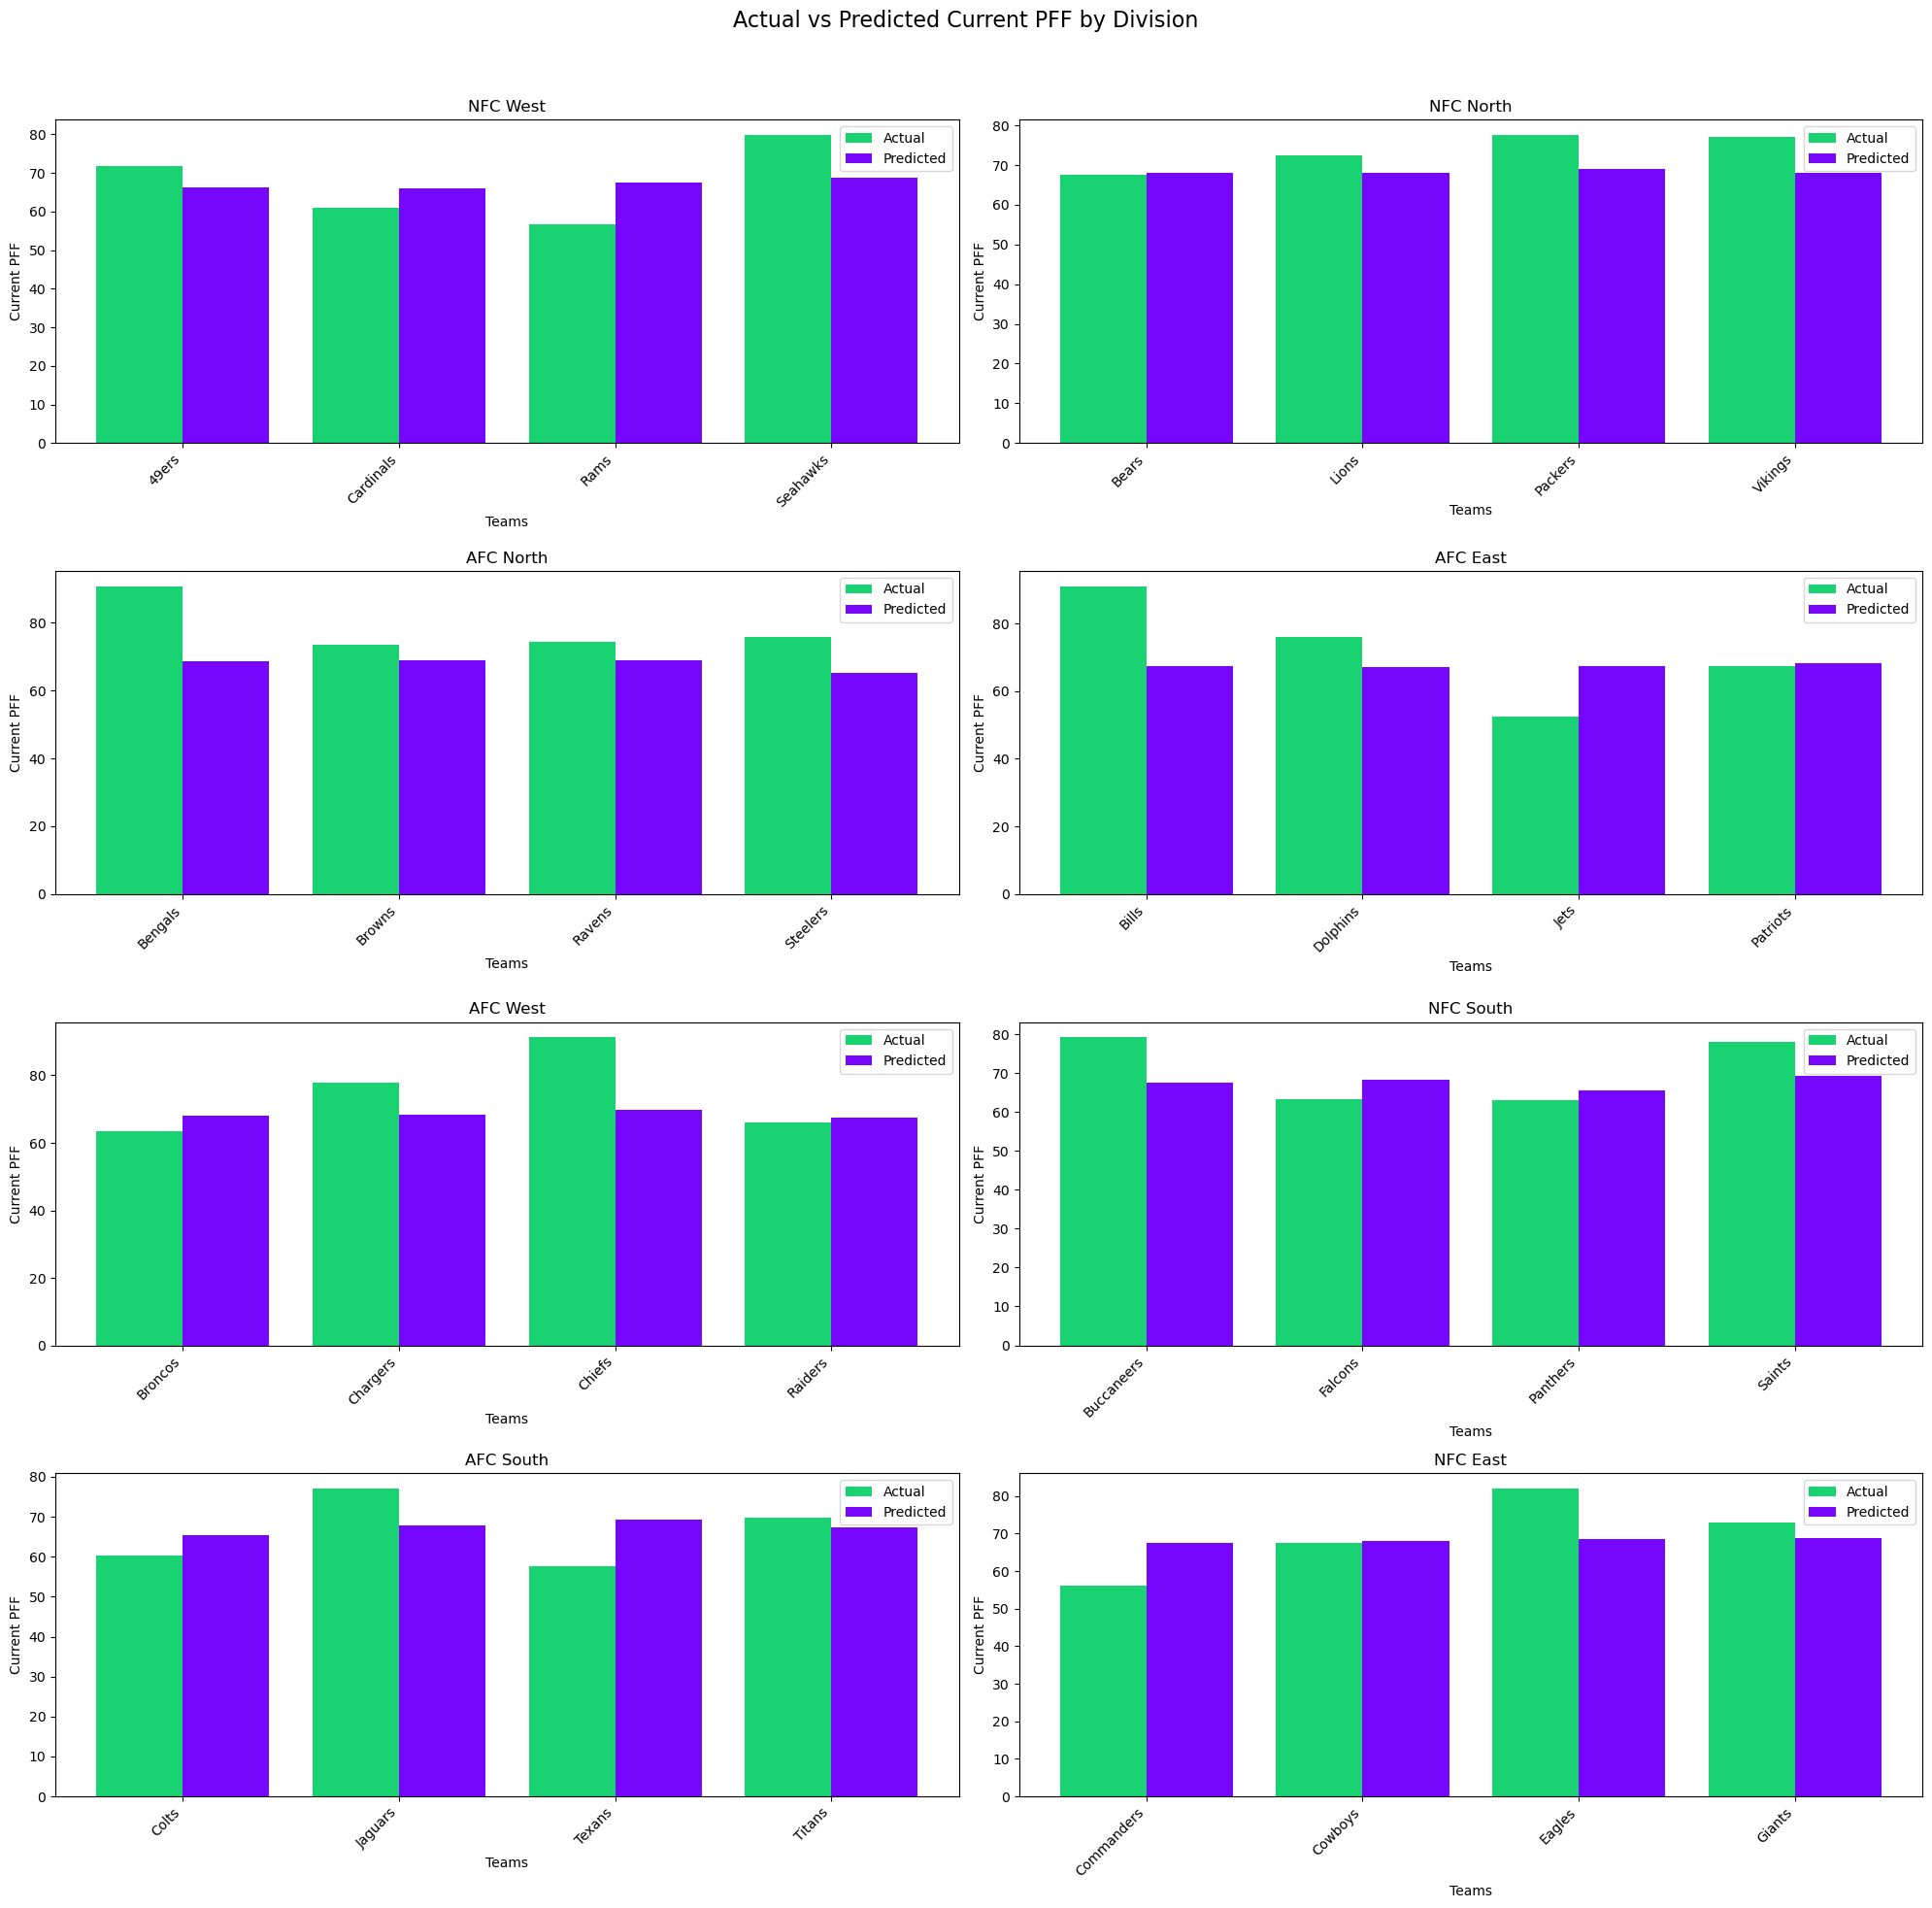

Best -0.07711212873825946
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 243.8079 - val_loss: 82.9612
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 251.2482 - val_loss: 71.7167
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173.7636 - val_loss: 63.5055
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 142.2015 - val_loss: 61.5073
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 175.1383 - val_loss: 62.3423
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 380.7087 - val_loss: 85.7820
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173.7056 - val_loss: 114.9626
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 219.0815 - val_loss: 103.1456
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 180.2962 - val_loss: 71.3969
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 151.6313 - val_loss: 56.5716
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 200.9055 - val_loss: 55.0597
Epoch 12/100
4/4 ━━━━━━

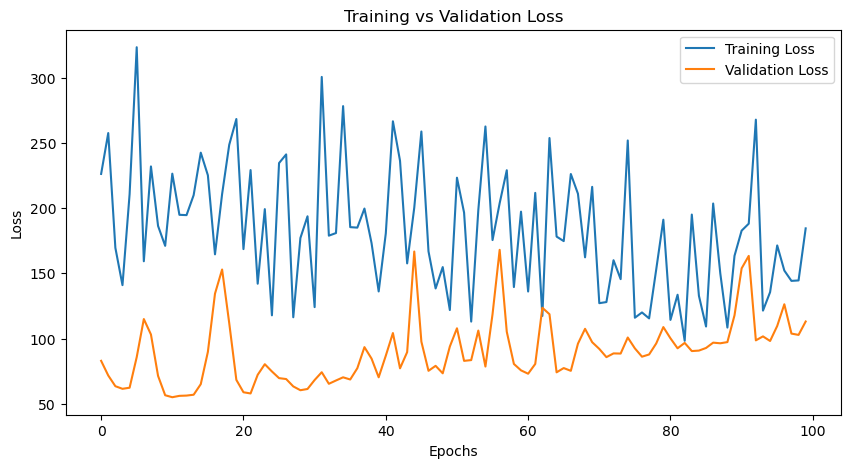

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.1201
Saved new best model with R² = 0.1201


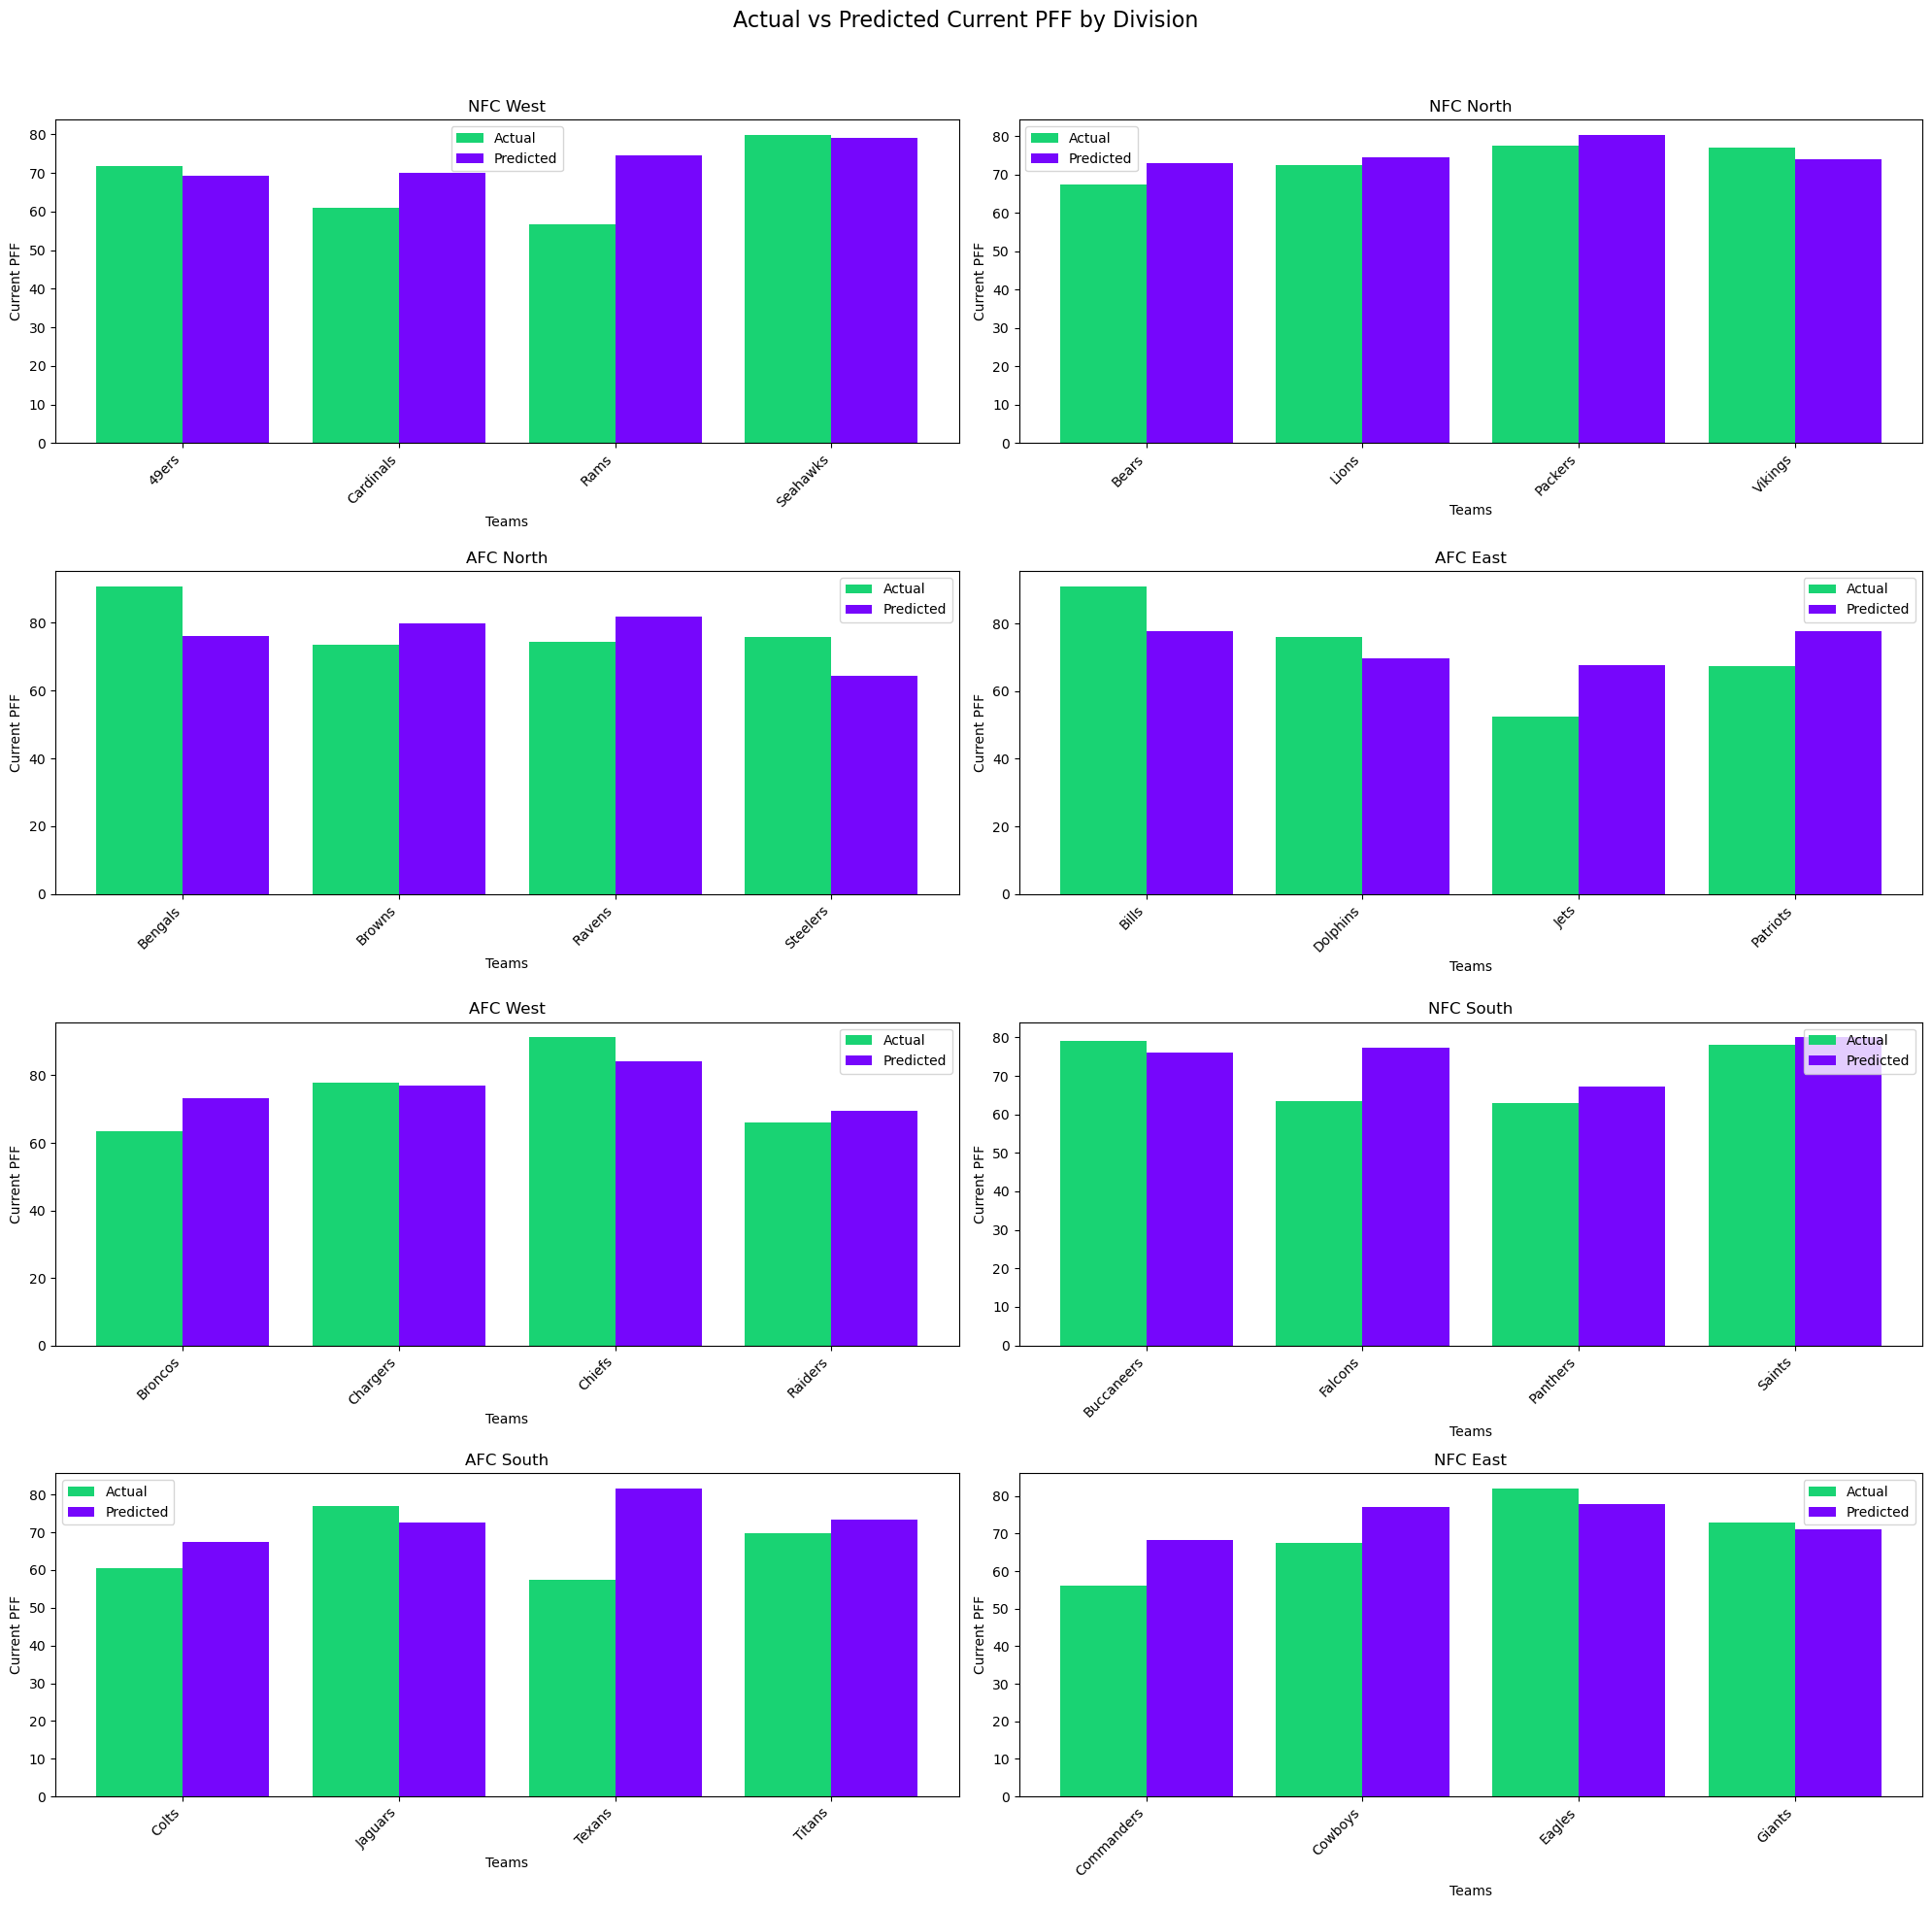

Best 0.12012756540513725
Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 200.9843 - val_loss: 114.1117
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.9060 - val_loss: 112.8302
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.2754 - val_loss: 126.1898
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 138.2474 - val_loss: 119.1453
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 255.3413 - val_loss: 120.9352
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 176.9952 - val_loss: 120.8926
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187.7123 - val_loss: 118.5147
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 177.5255 - val_loss: 158.1139
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 208.4403 - val_loss: 141.2022
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 196.3047 - val_loss: 109.5917
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 122.4954 - val_loss: 160.4556
Epoch 12/150
4/4 

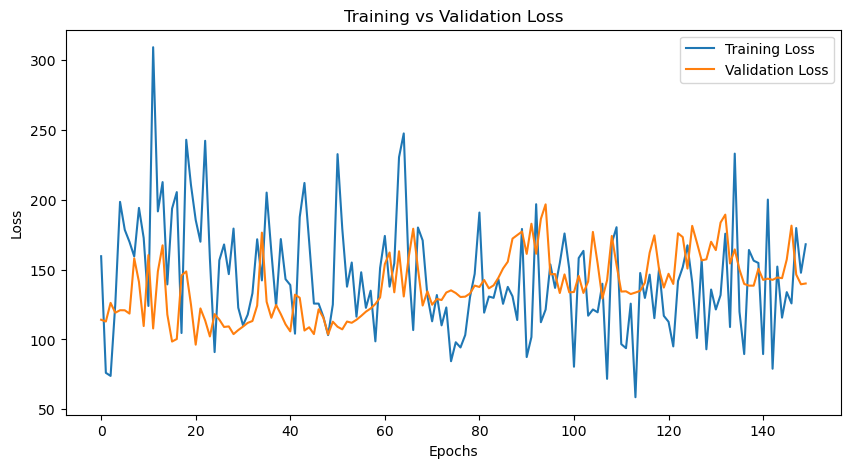

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.1427
Saved new best model with R² = 0.1427


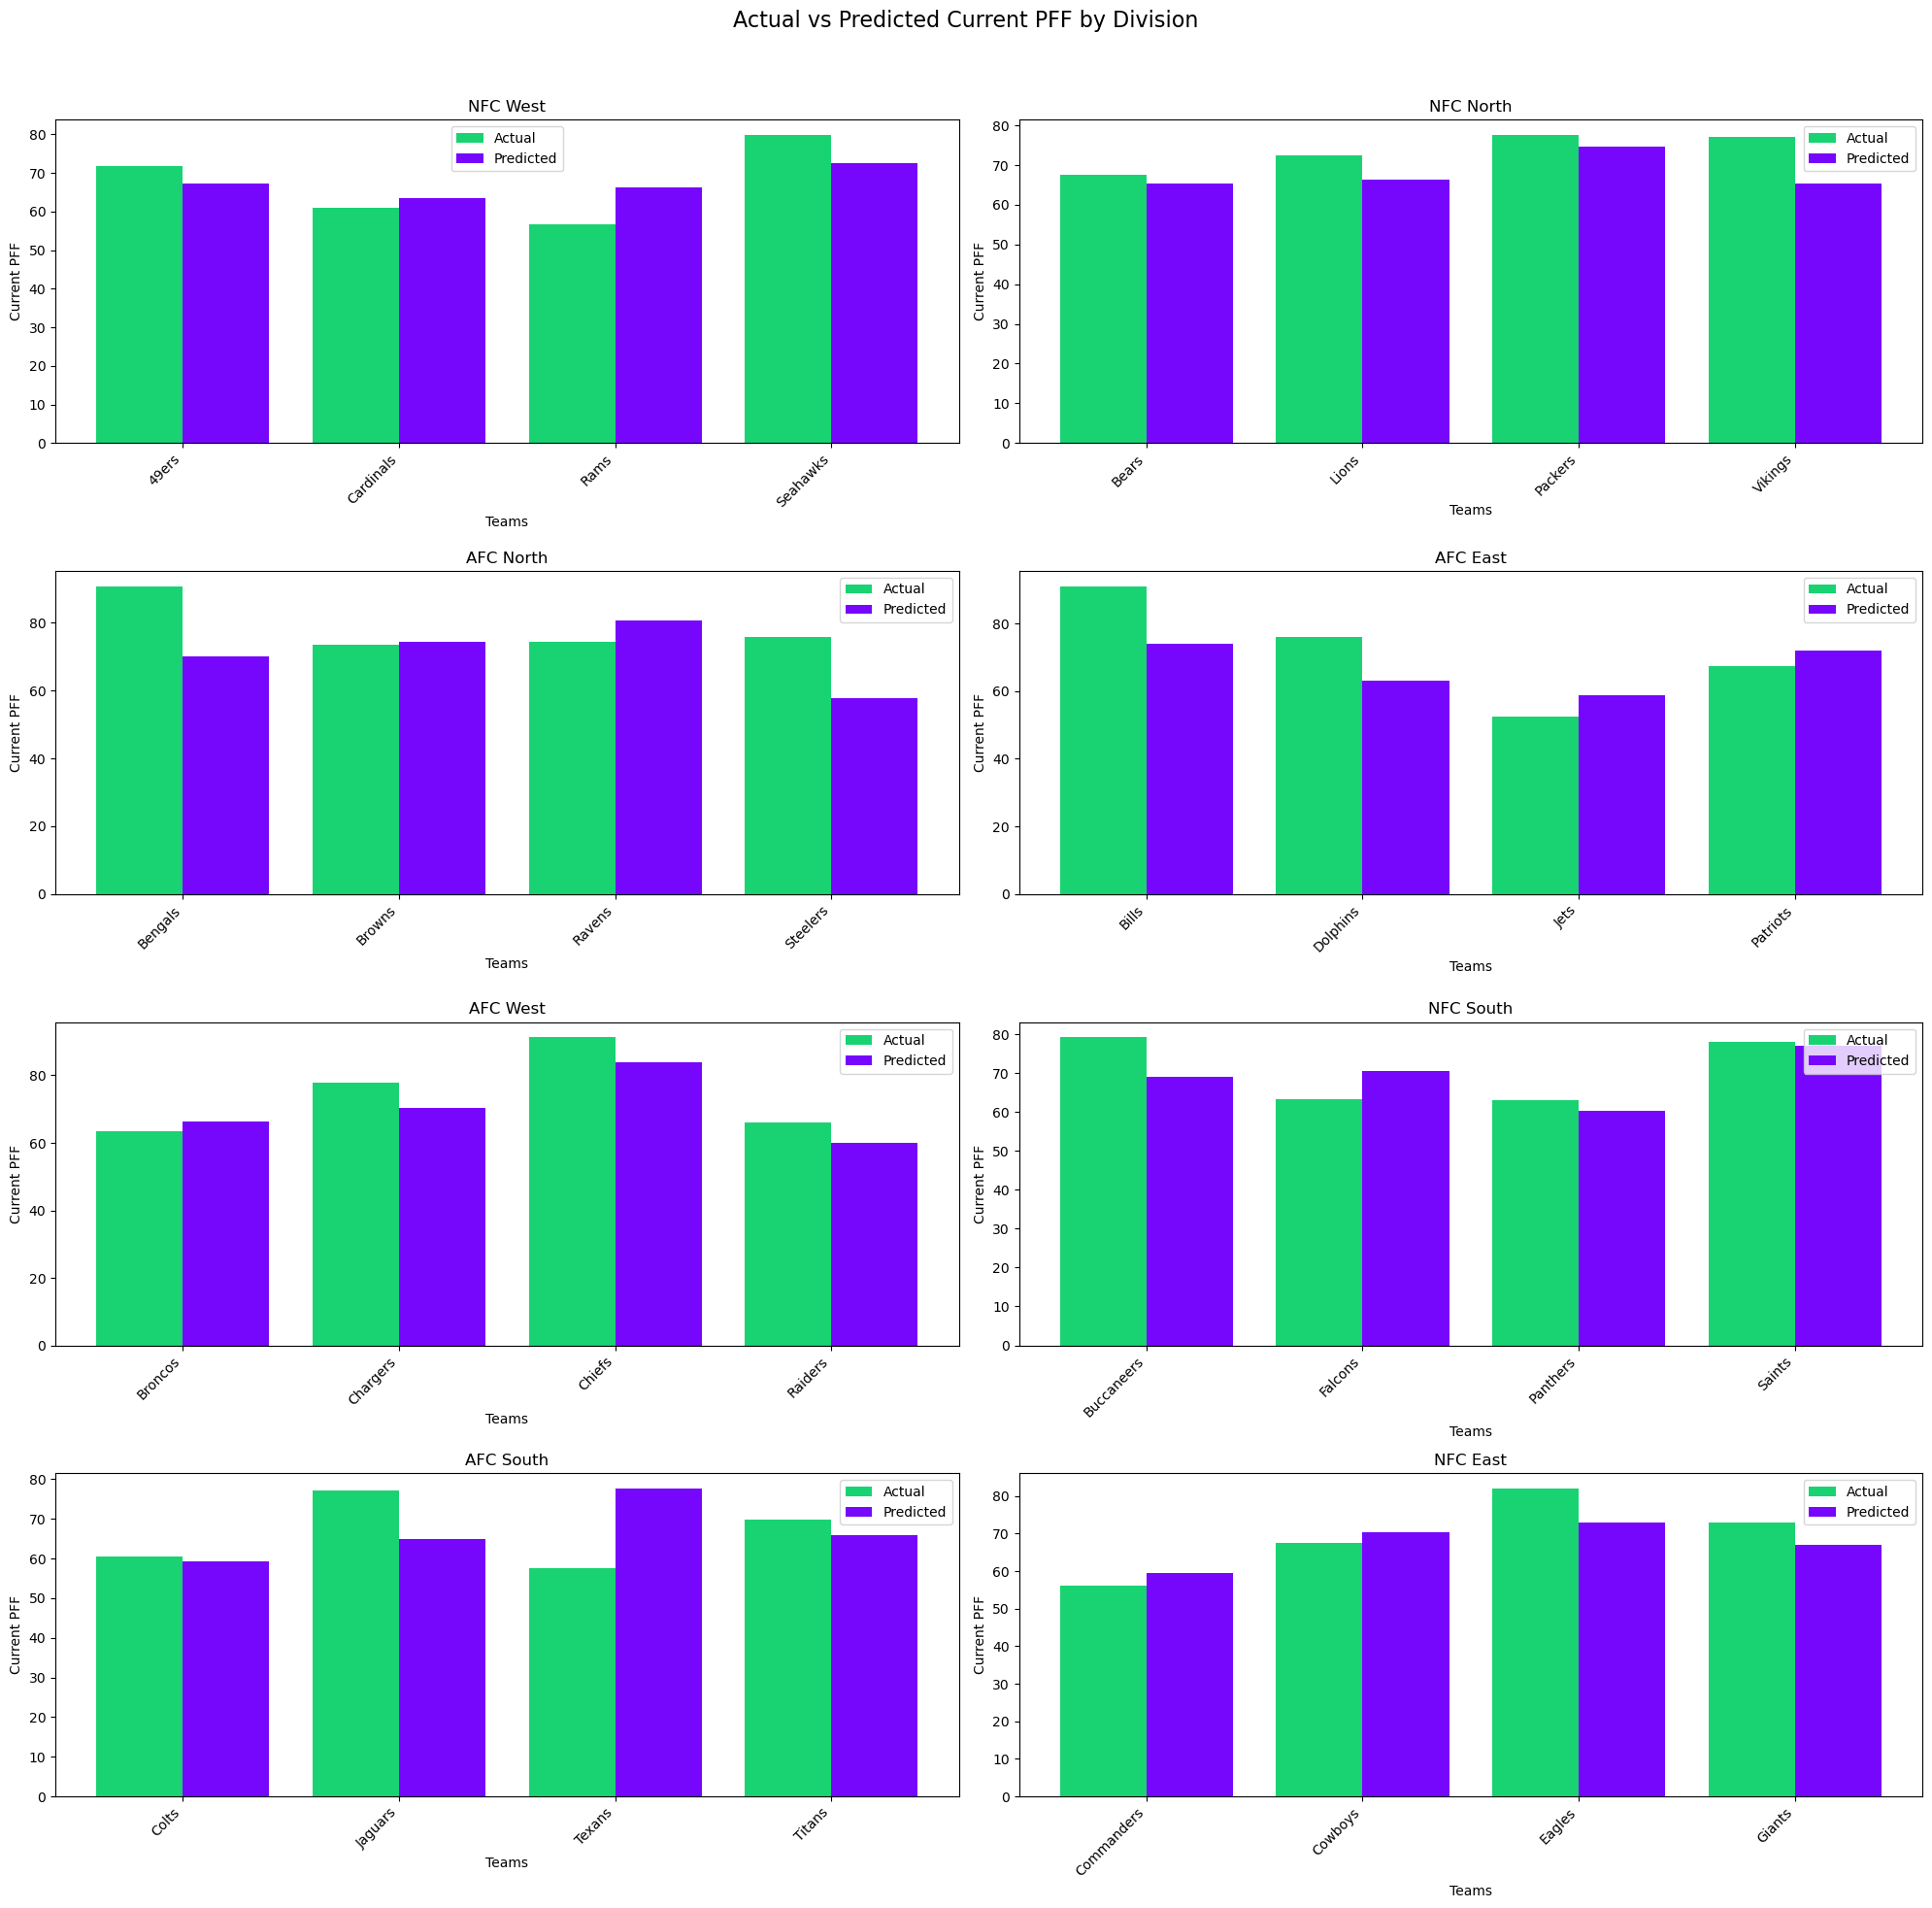

Best 0.14266301775191625
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 135.8299 - val_loss: 136.1032
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103.6184 - val_loss: 156.3595
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 134.8995 - val_loss: 154.9381
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 166.9819 - val_loss: 127.2460
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.7464 - val_loss: 132.3546
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.9750 - val_loss: 165.5521
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 181.0704 - val_loss: 176.4487
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257.5728 - val_loss: 125.9975
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.9017 - val_loss: 157.2673
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 146.5835 - val_loss: 178.8559
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 163.1514 - val_loss: 125.0944
Epoch 12/200
4/4 

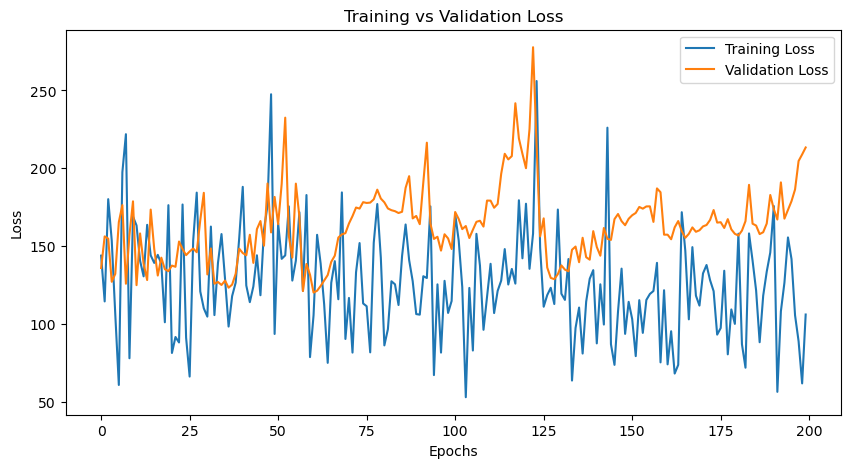

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R² Score: 0.1364


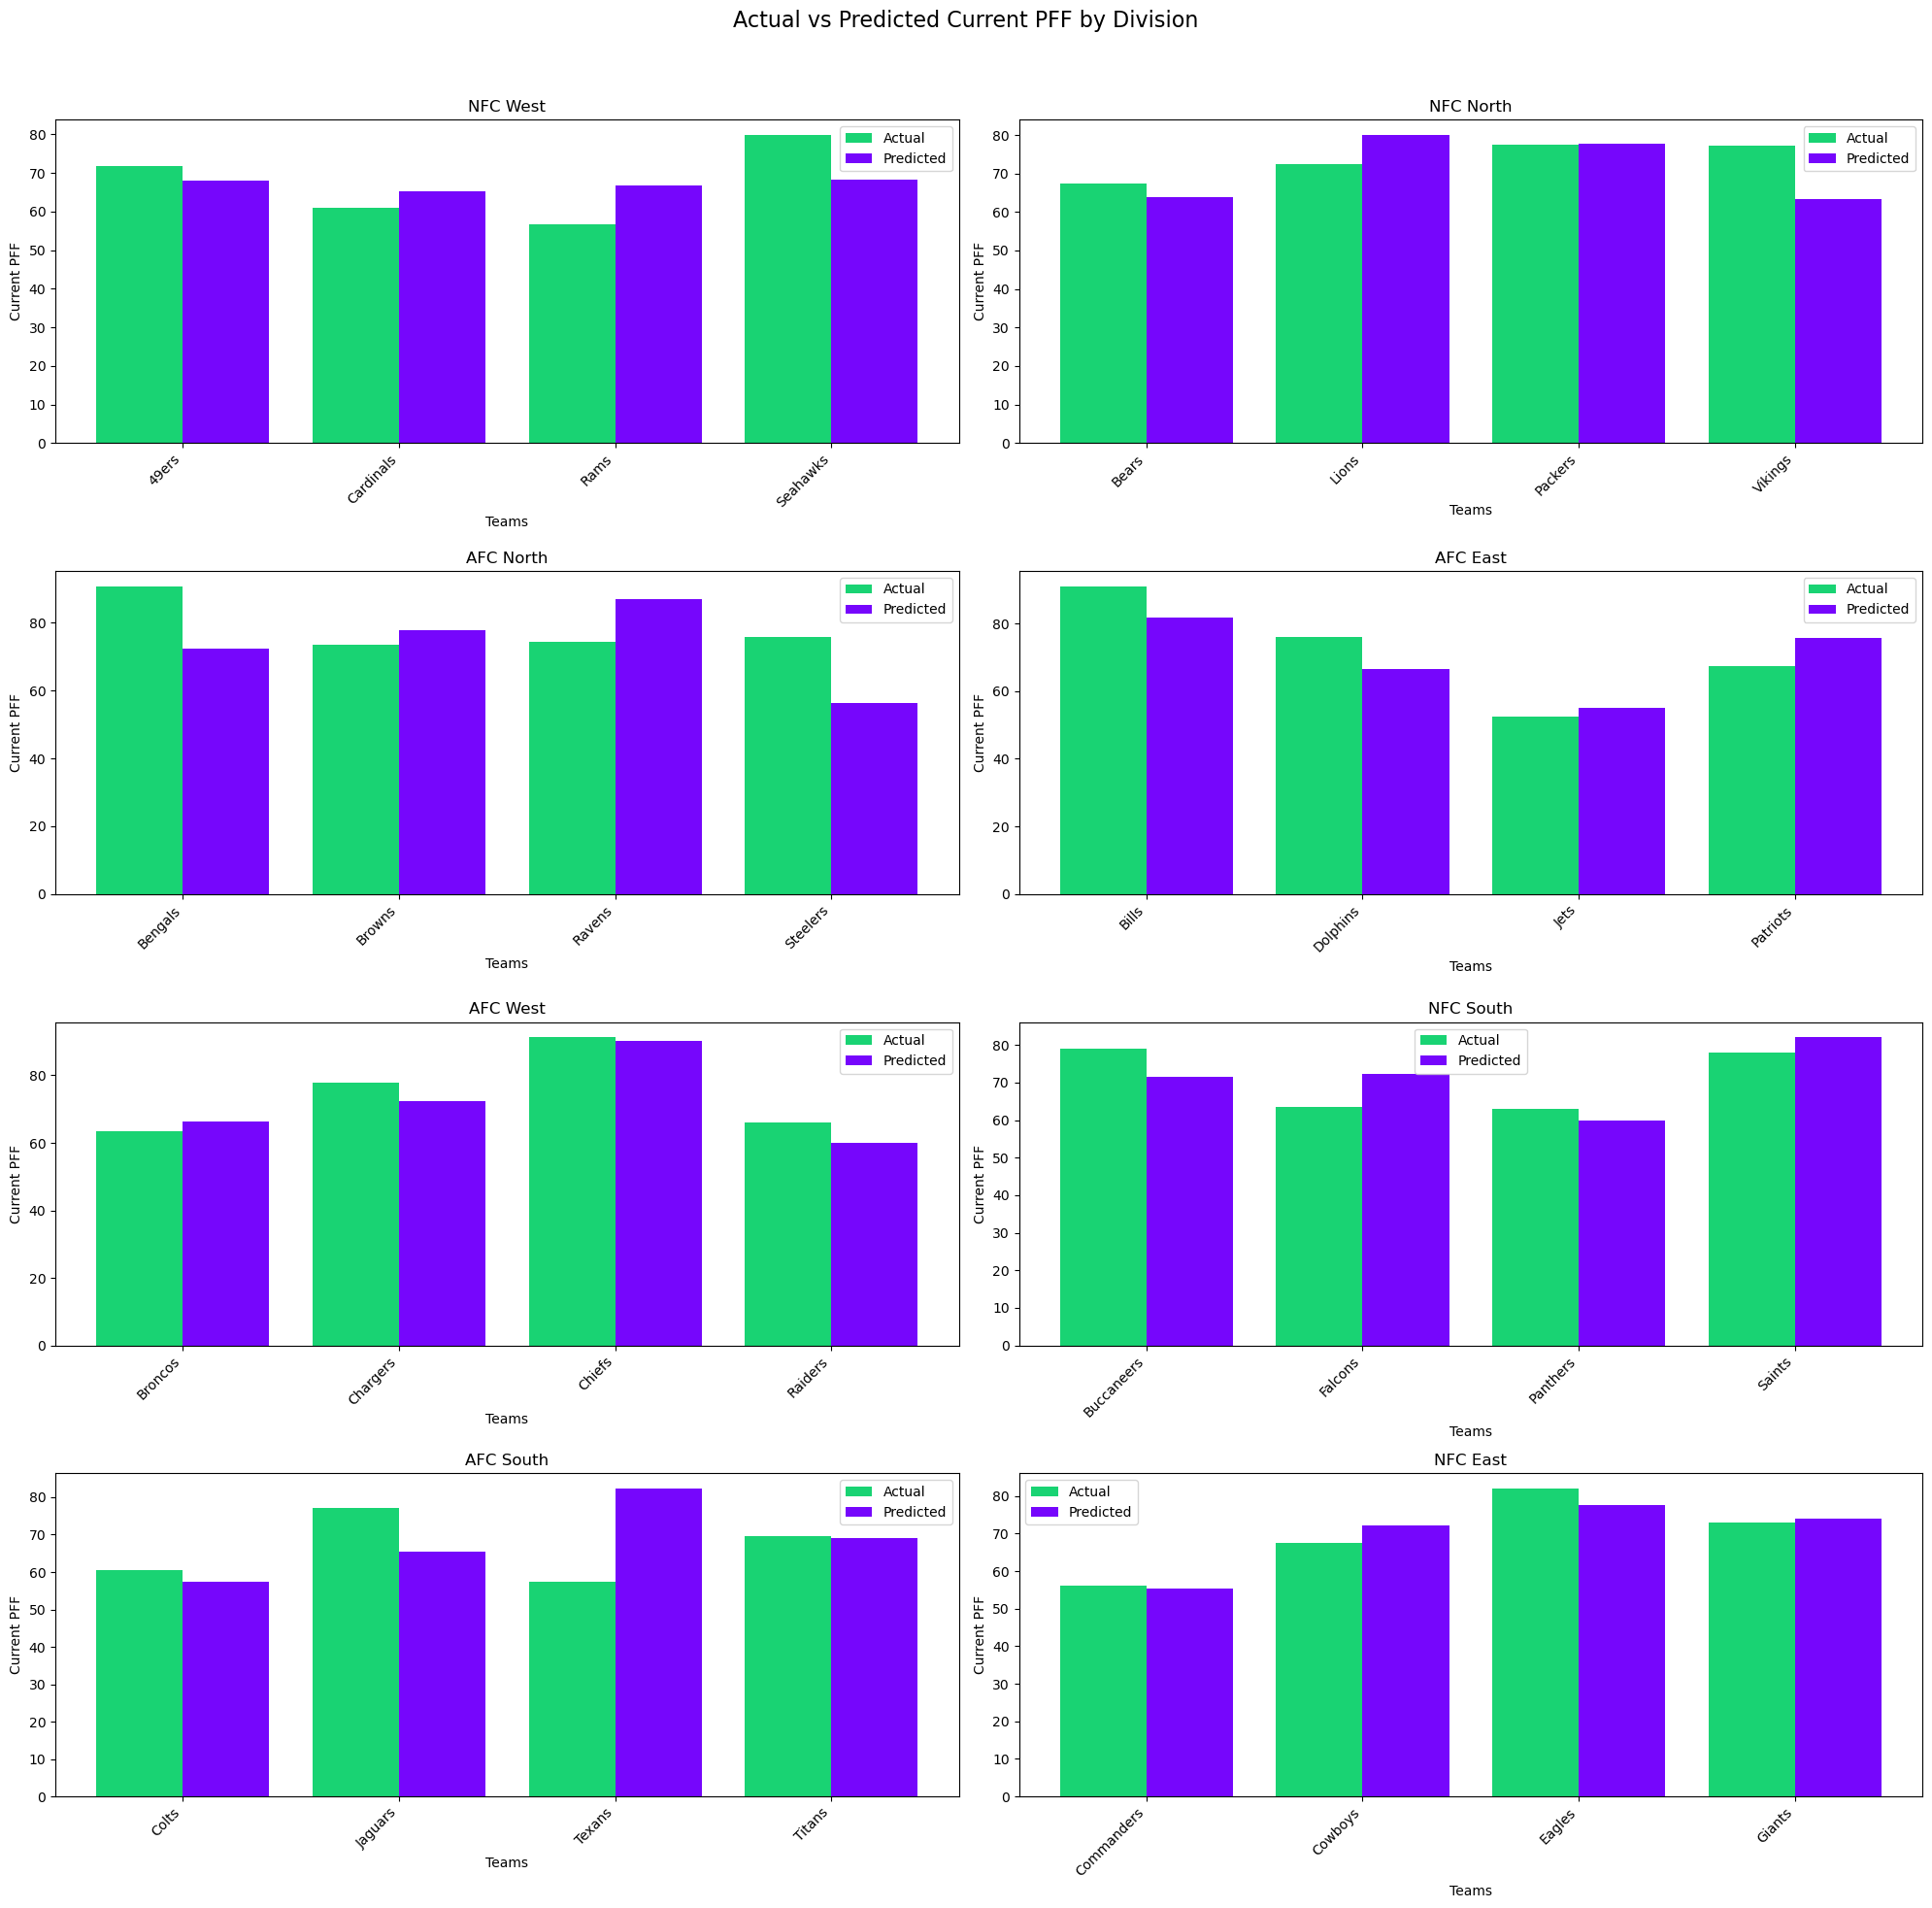

Best 0.14266301775191625
Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 96.1413 - val_loss: 215.3494
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 127.5902 - val_loss: 203.7925
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149.8637 - val_loss: 197.6334
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139.7151 - val_loss: 198.5599
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109.9375 - val_loss: 201.5258
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.1403 - val_loss: 200.9915
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 172.3704 - val_loss: 196.5387
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 113.3201 - val_loss: 195.3642
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139.1944 - val_loss: 190.5646
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 147.0790 - val_loss: 181.1002
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98.0242 - val_loss: 179.1882
Epoch 12/250
4/4 ━

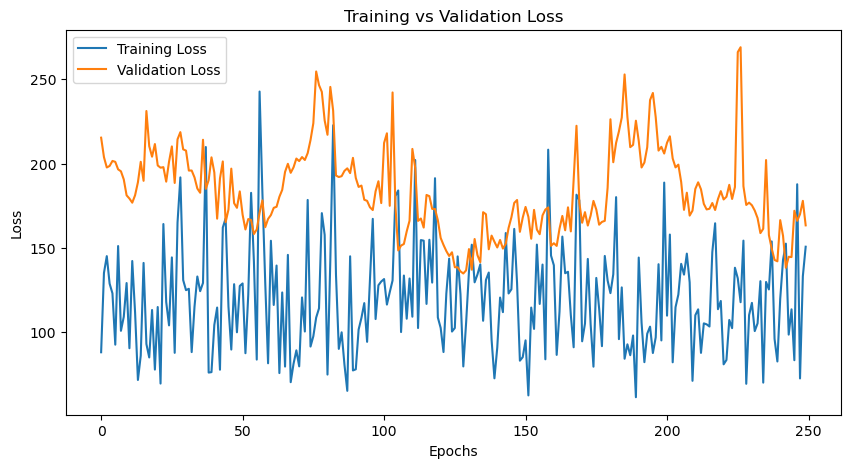

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.2201
Saved new best model with R² = 0.2201


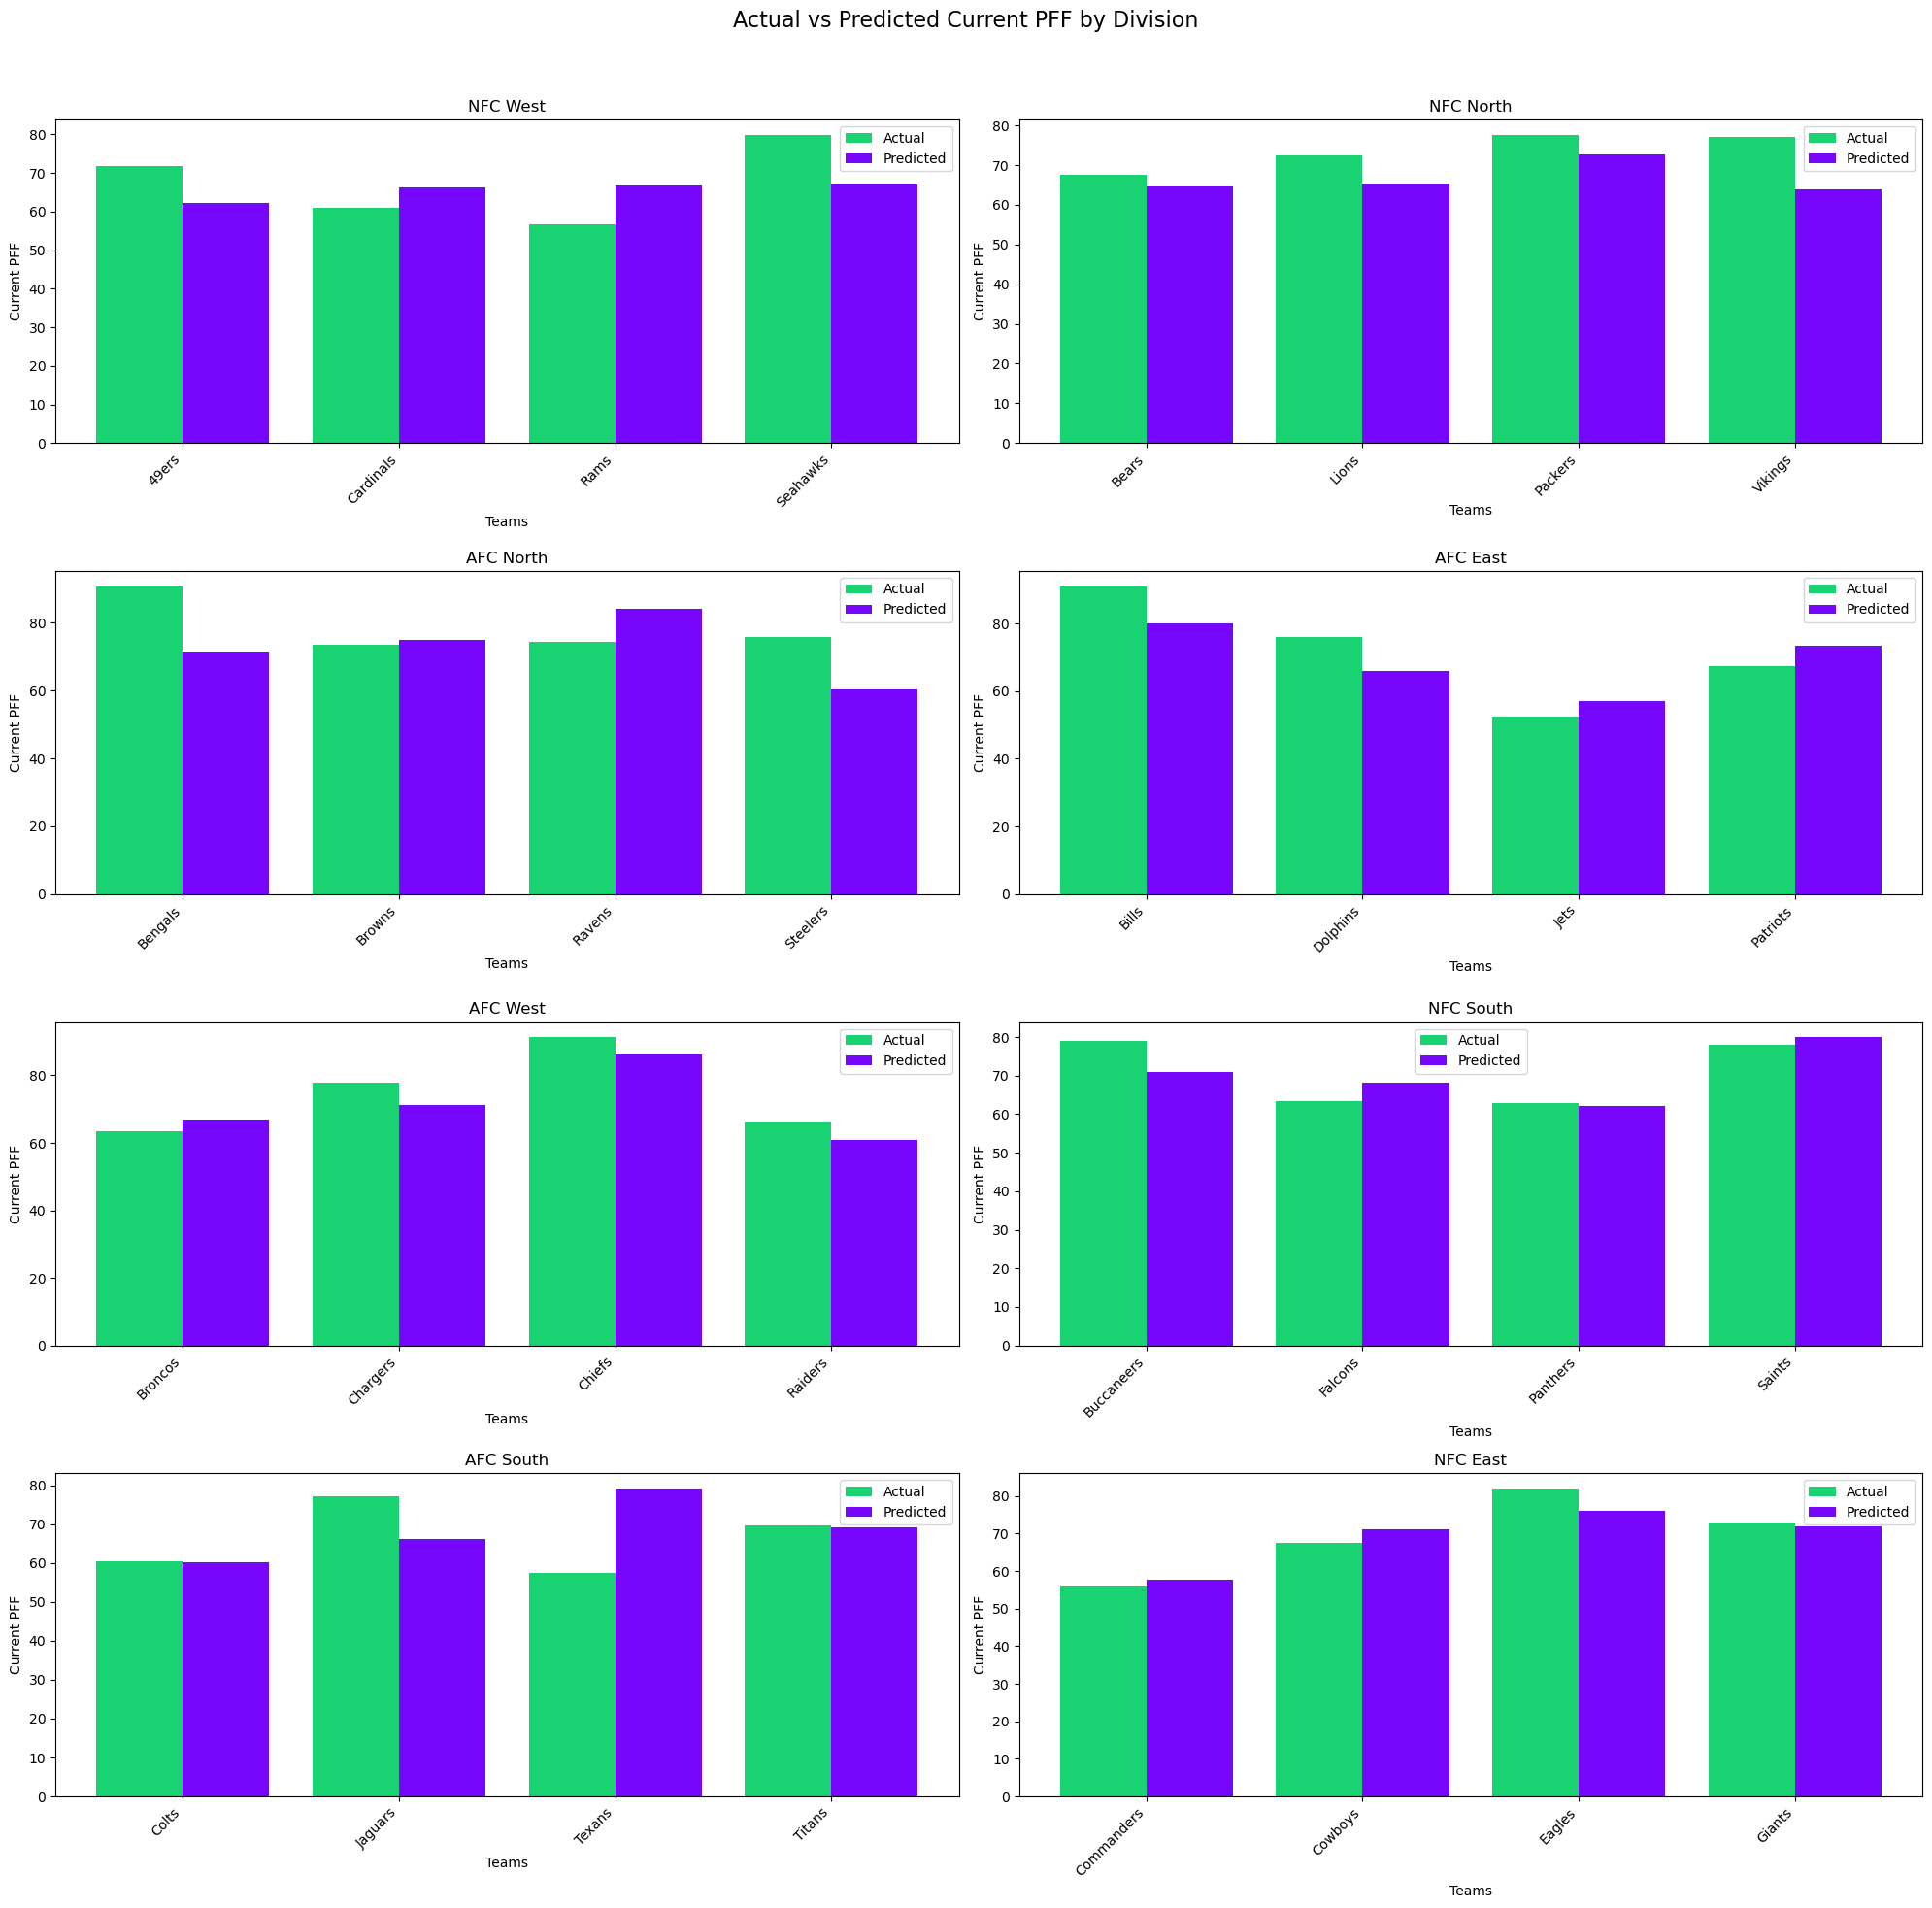

Best 0.2200769206871792
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 82.2358 - val_loss: 171.7543
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.6881 - val_loss: 209.0662
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 141.0912 - val_loss: 228.3034
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 138.3176 - val_loss: 203.0812
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71.3054 - val_loss: 184.9619
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 118.6602 - val_loss: 192.1274
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 129.2155 - val_loss: 195.1271
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.8818 - val_loss: 189.1175
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.5937 - val_loss: 225.0675
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 148.6346 - val_loss: 250.5365
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 133.9778 - val_loss: 186.5705
Epoch 12/500
4/4 ━━

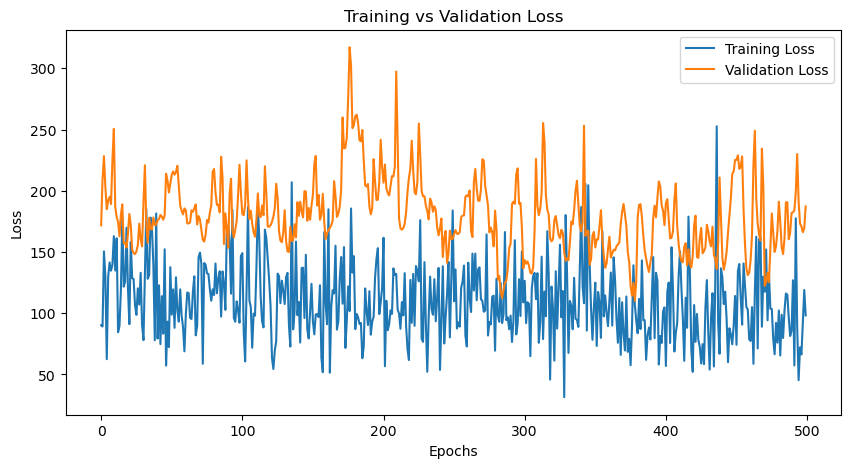

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R² Score: 0.3647
Saved new best model with R² = 0.3647


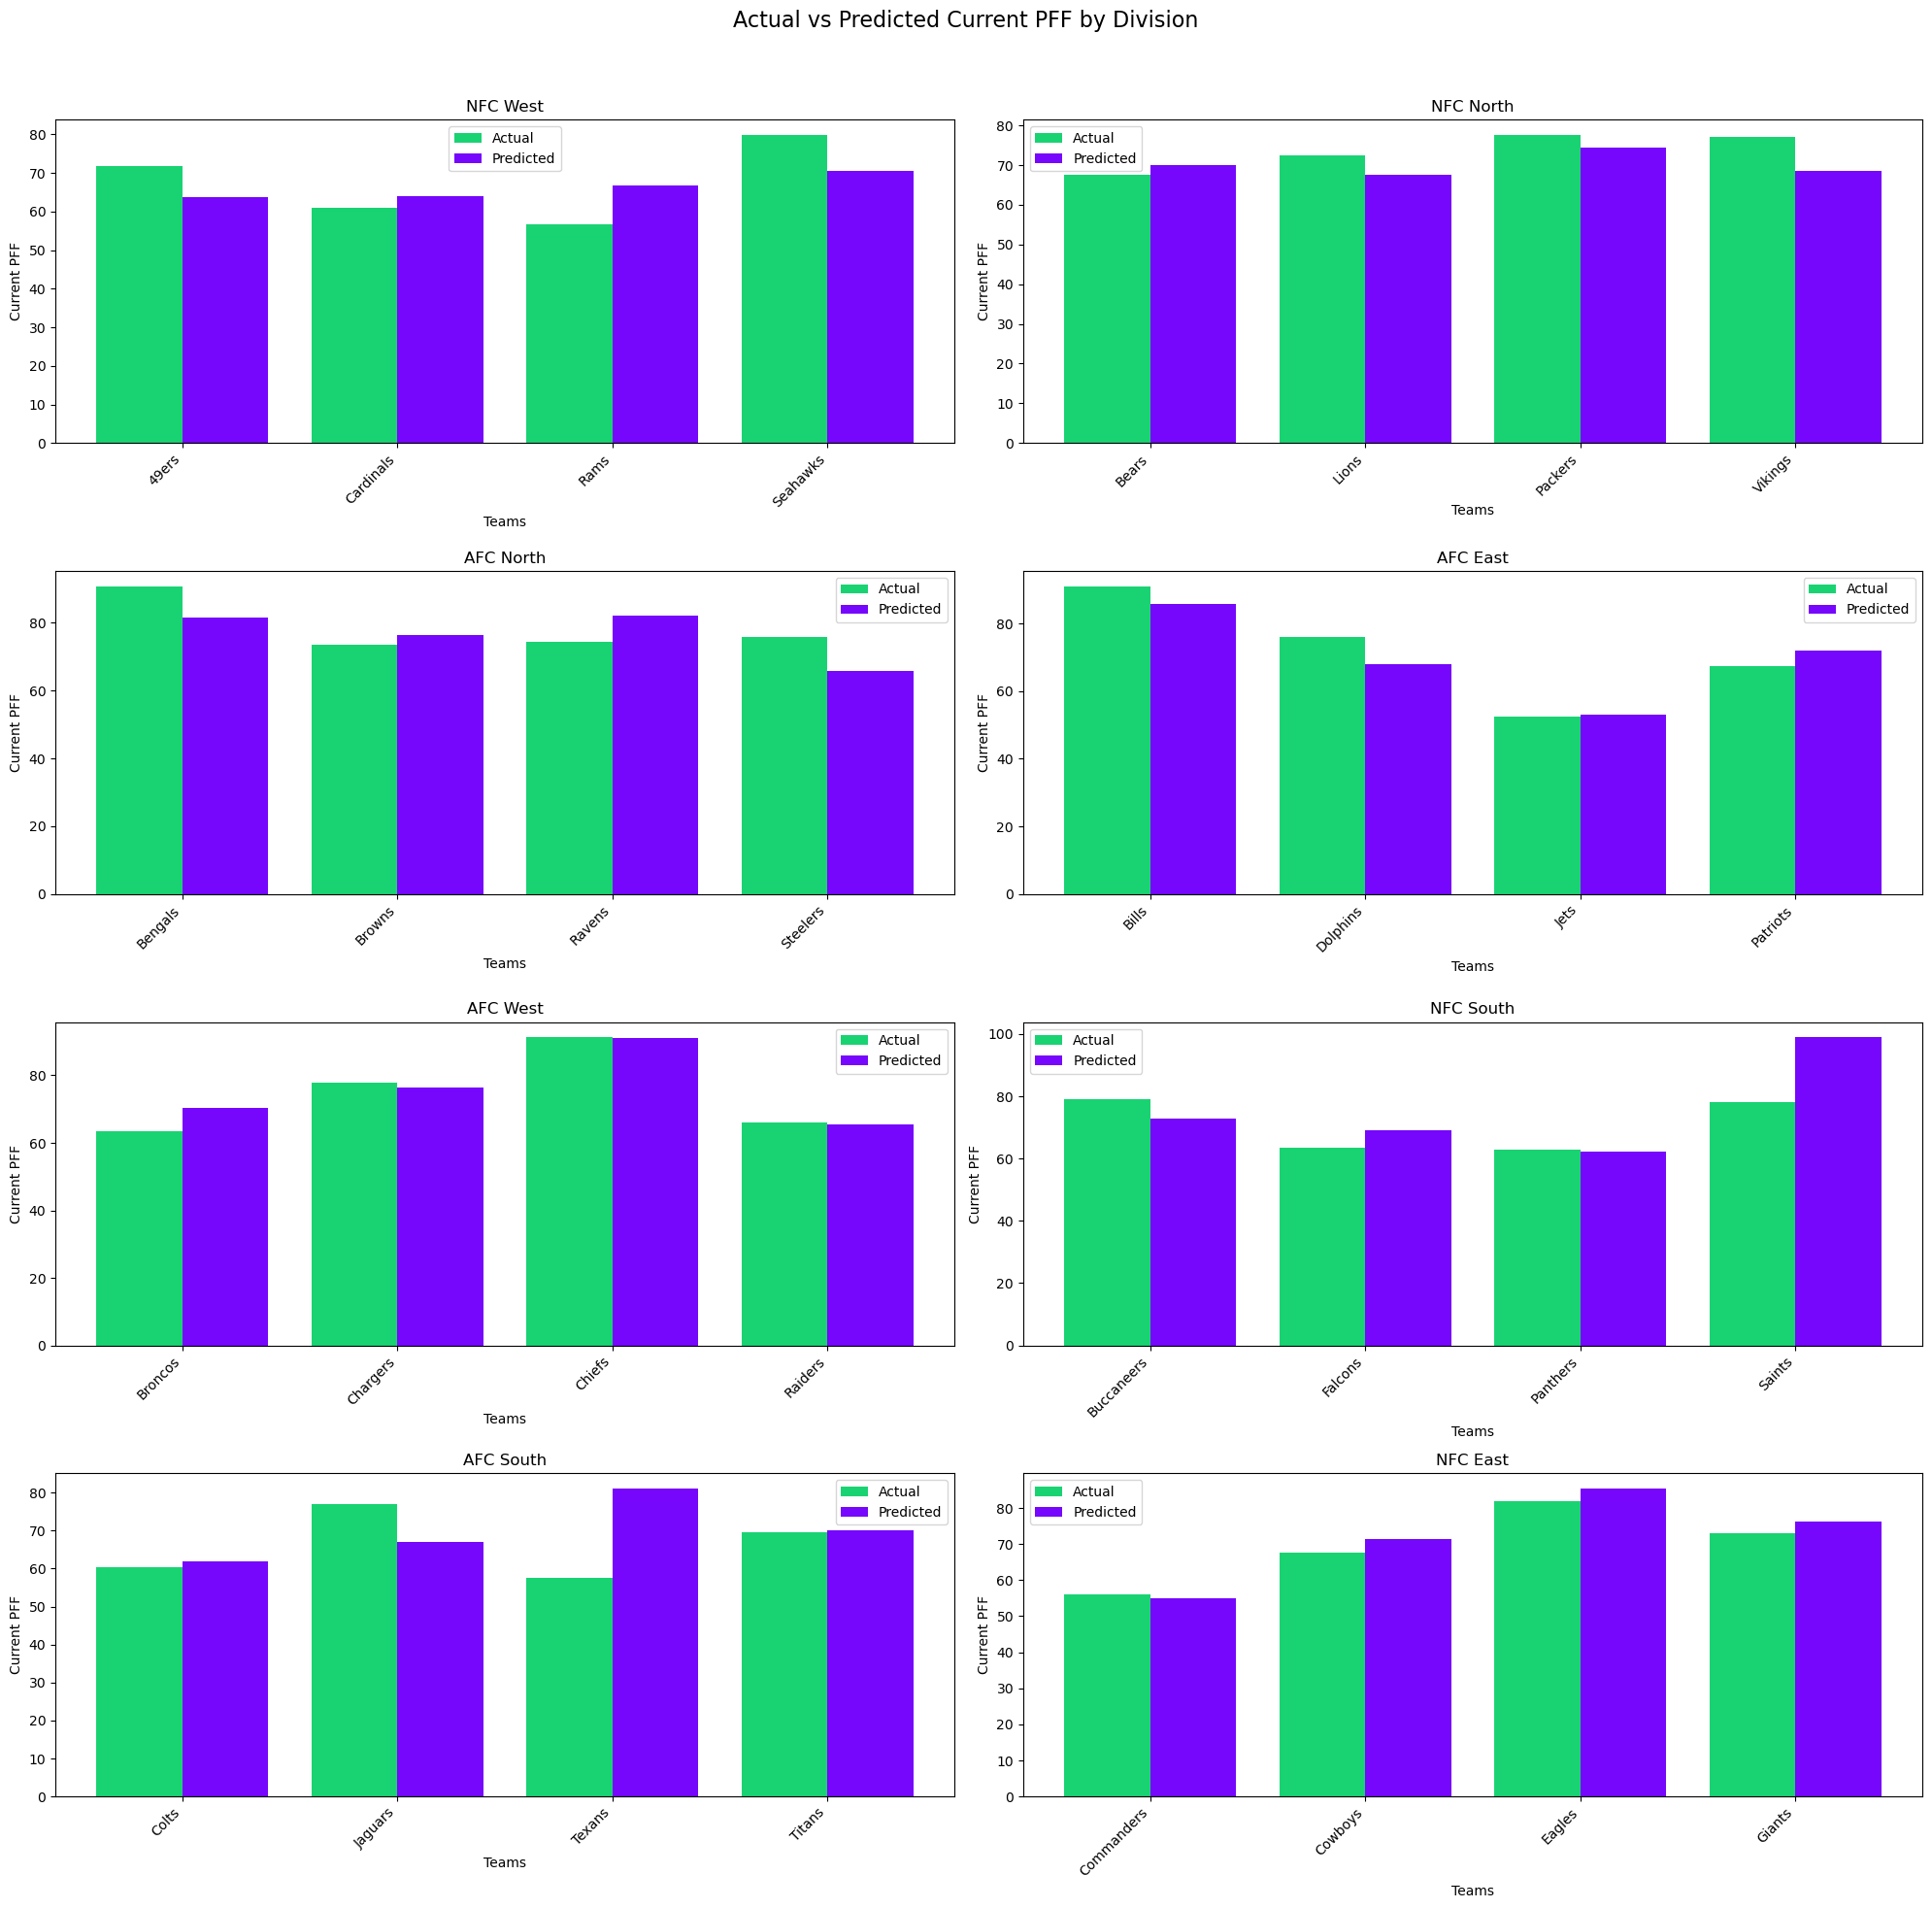

Best 0.36472100663987994
Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 99.3479 - val_loss: 180.8315
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.5080 - val_loss: 168.8893
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.7972 - val_loss: 163.6585
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.5060 - val_loss: 164.7585
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.2686 - val_loss: 167.7845
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.6438 - val_loss: 197.9989
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 117.7063 - val_loss: 185.9500
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.3847 - val_loss: 174.4089
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.0228 - val_loss: 182.0956
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.9888 - val_loss: 191.4754
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5825 - val_loss: 182.8521
Epoch 12/750
4/4 ━━━━━━━

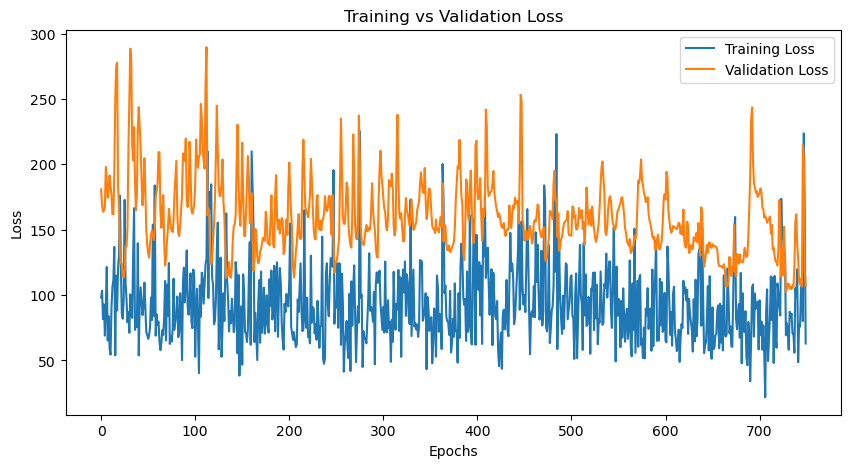

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R² Score: 0.5691
Saved new best model with R² = 0.5691


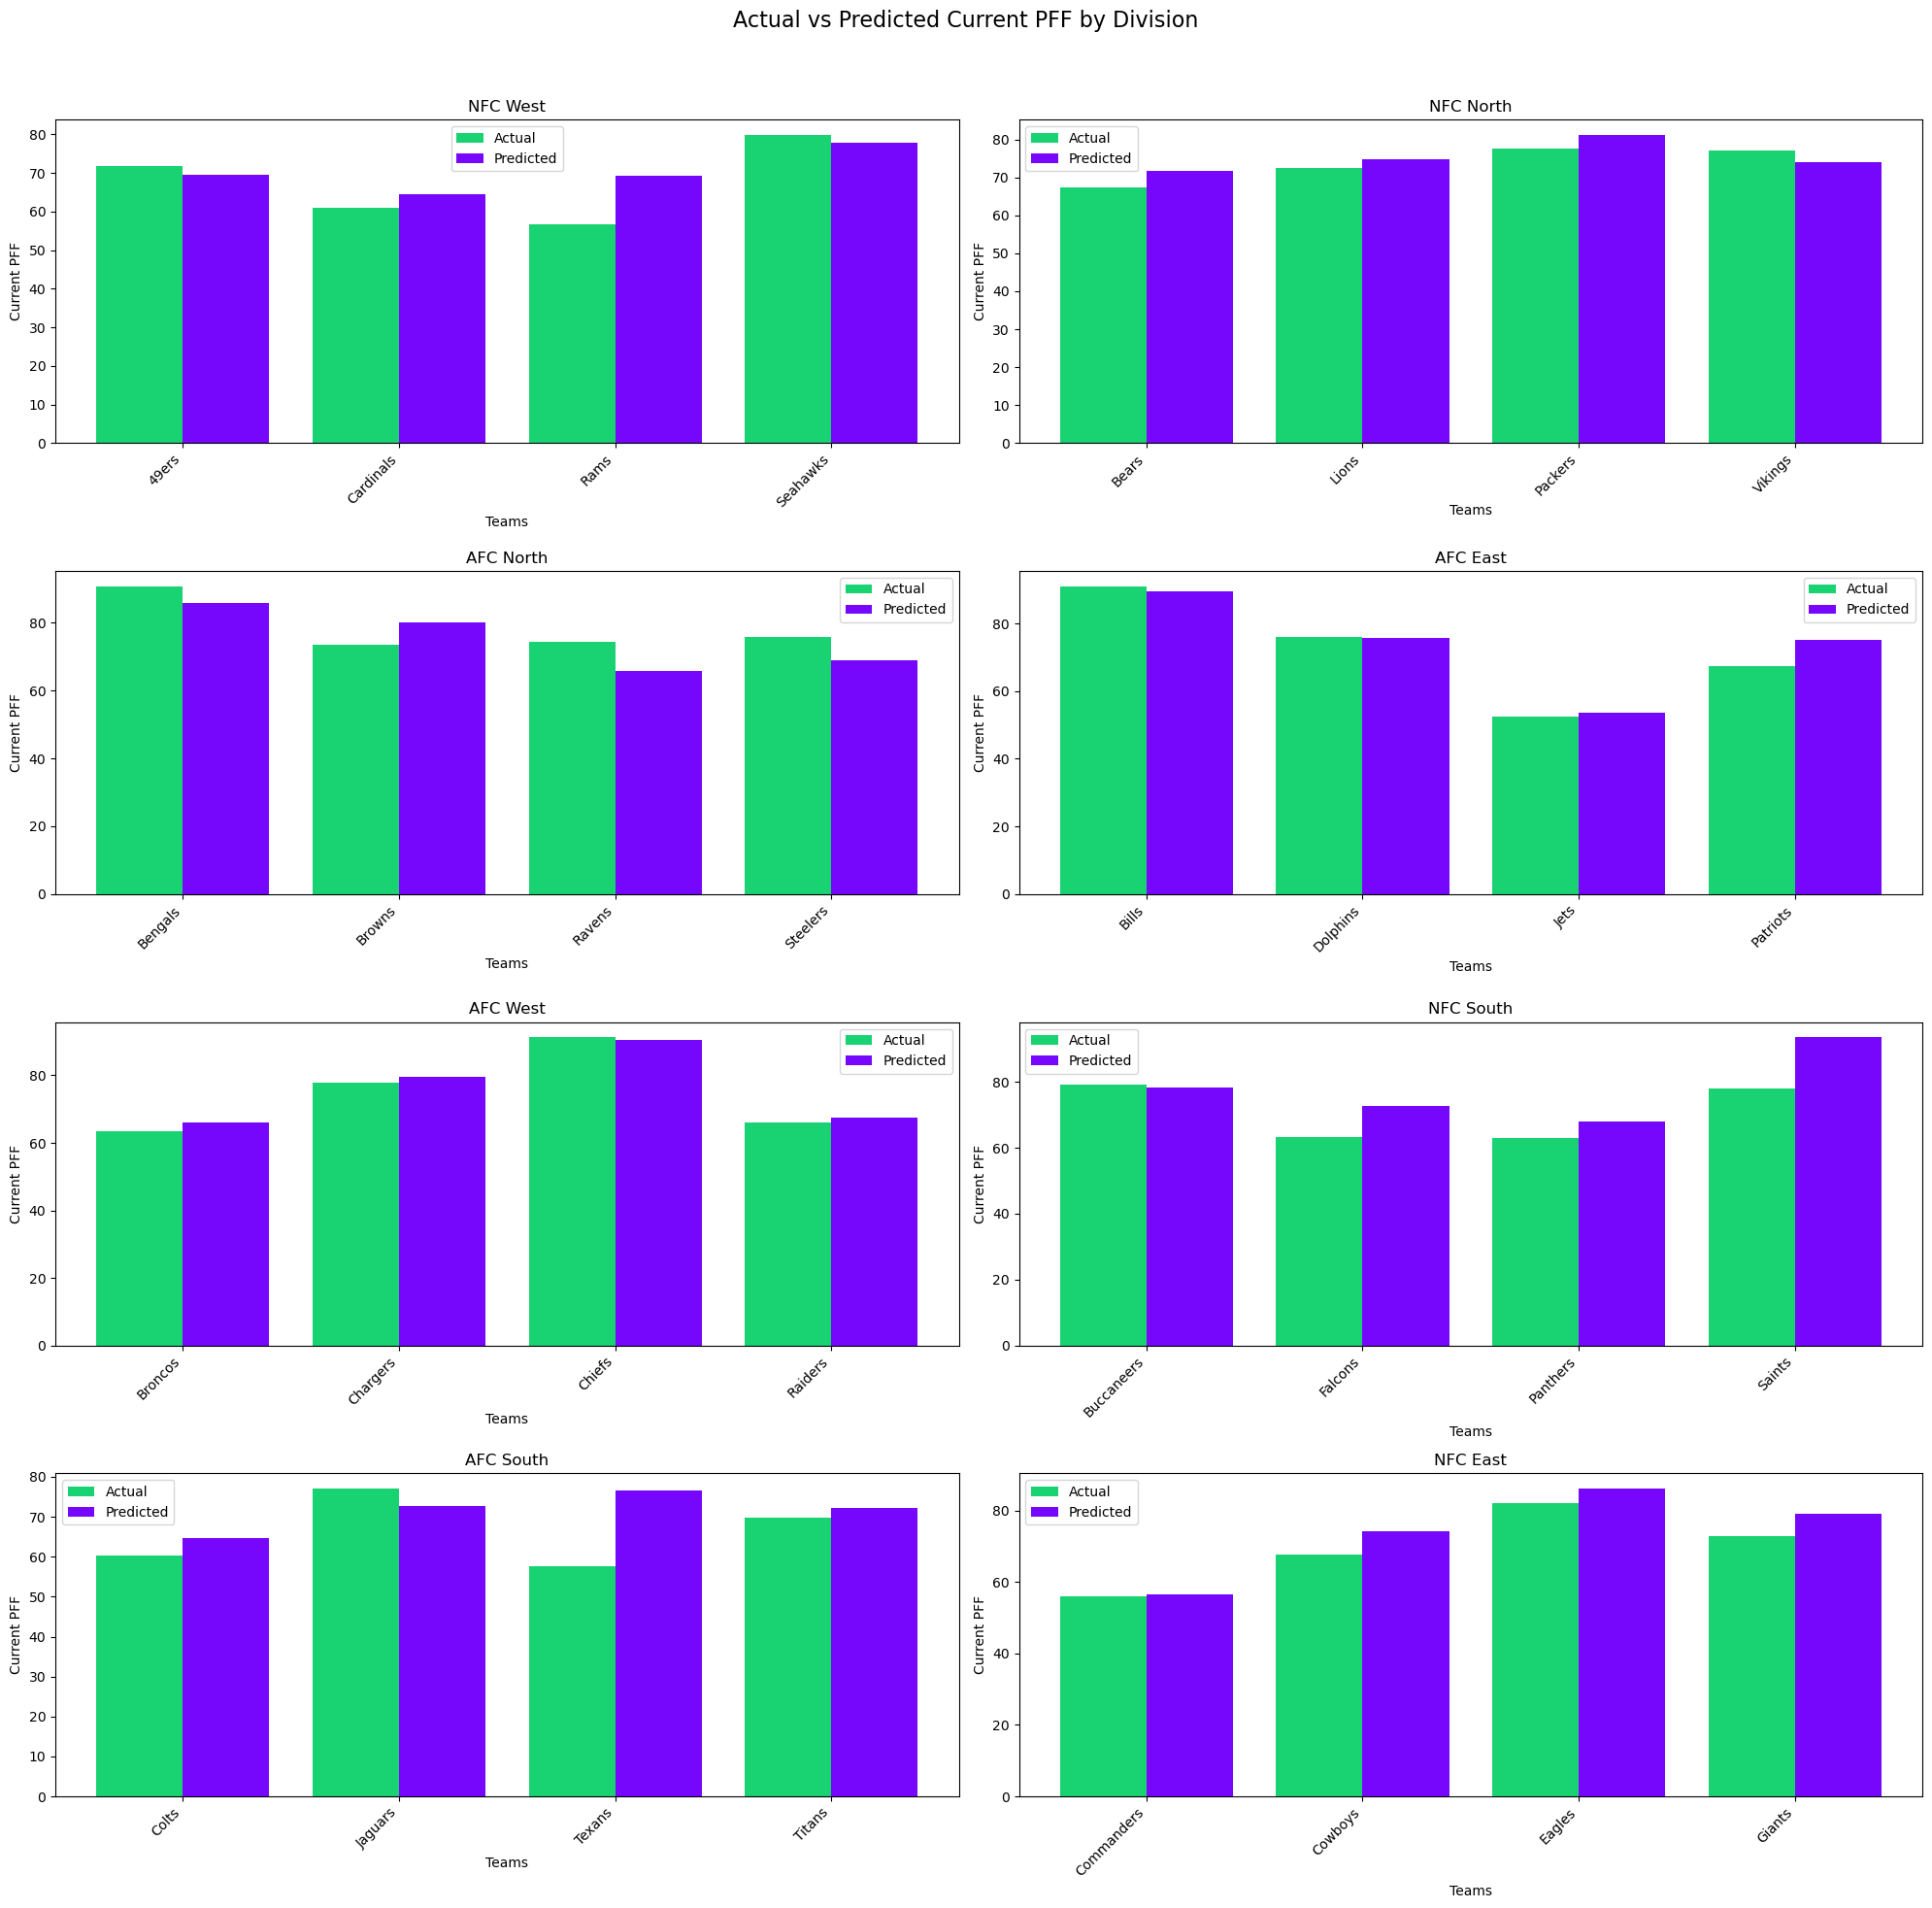

Best 0.5690706073785519


In [247]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [80, 100, 150, 200, 250, 500, 750]
best_r2 = -np.infty
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        model.save("best_model.keras")        
        print(f"Saved new best model with R² = {best_r2:.4f}")

    # Plot actual vs predicted values
    data = df[df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
    print("Best " + str(best_r2))
    
